Explicit PCA

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

d0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/mnist_train.csv')
print(d0.head(5))
l = d0['label']

d = d0.drop('label', axis=1)


   label  1x1  1x2  1x3  1x4  1x5  1x6  1x7  1x8  1x9  ...  28x19  28x20  \
0      5    0    0    0    0    0    0    0    0    0  ...      0      0   
1      0    0    0    0    0    0    0    0    0    0  ...      0      0   
2      4    0    0    0    0    0    0    0    0    0  ...      0      0   
3      1    0    0    0    0    0    0    0    0    0  ...      0      0   
4      9    0    0    0    0    0    0    0    0    0  ...      0      0   

   28x21  28x22  28x23  28x24  28x25  28x26  28x27  28x28  
0      0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0      0  

[5 rows x 785 columns]


In [ ]:
print(d.shape)
print(l.shape)

(60000, 784)
(60000,)


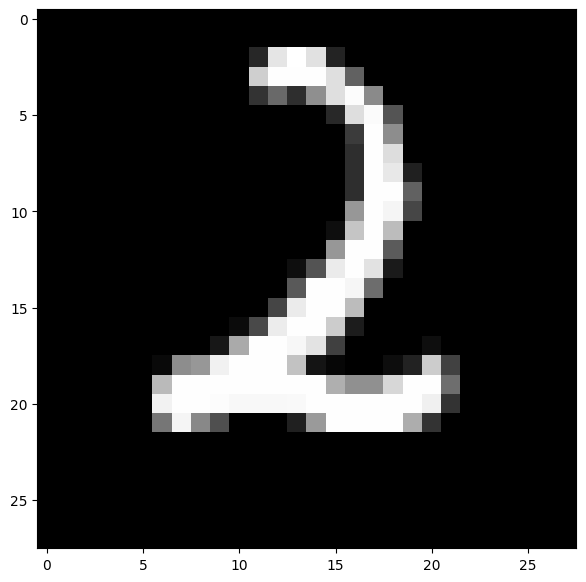

2


In [ ]:
plt.figure(figsize=(7,7))
idx = 122

grid_data = d.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data, interpolation = 'none', cmap = 'gray')
plt.show()
print(l[idx])

In [ ]:
labels = l.head(15000)
data =  d.head(15000)

print(data.shape)

(15000, 784)


In [ ]:
#data-preprocessing, stanardizing the data -> (x_i-u_i)/(standard deviation)_i
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit_transform(data)
print(standardized_data.shape)

(15000, 784)


In [ ]:
#Covariance matrix -> A^T * A (making a square matrix)
sample_data = standardized_data
#matrix multiplication
cover_matrix = np.matmul(sample_data.T, sample_data) #.t for transpose
print(cover_matrix.shape)

(784, 784)


In [ ]:
#finding top two eigen values and corresponding eigen vectors
from scipy.linalg import eigh
# 'sub_set_index' defined -> (low to high values), returns eigen vlues in ascending
values,vectors = eigh(cover_matrix, subset_by_index=(782,783)) #only top 2 eigen values (782 and  783)
vectors = vectors.T # 784x2 -> 2x784
print(vectors.shape)



(2, 784)


In [ ]:
#to tranform 784 to 2 dimenssions only top two eigen values required hence
#multiply vectors(2x784) an sample_data^T(784x15000)= 2x15000

new_cord = np.matmul(vectors, sample_data.T)
print(new_cord.shape, labels.shape)

#Adding label to 2d projected data
new_cord = np.vstack((new_cord, labels.T)).T
#New dataframe for plotting points
dataframe = pd.DataFrame(data=new_cord, columns=("1st Principle", "2nd Principle", 'label'))
print(dataframe.head())

(2, 15000) (15000, 1)
   1st Principle  2nd Principle  label
0      -4.457050       0.960769    5.0
1      -7.397795      -8.658155    0.0
2       9.640690      -2.082854    4.0
3      -3.356074       7.187465    1.0
4       2.979880       4.933889    9.0


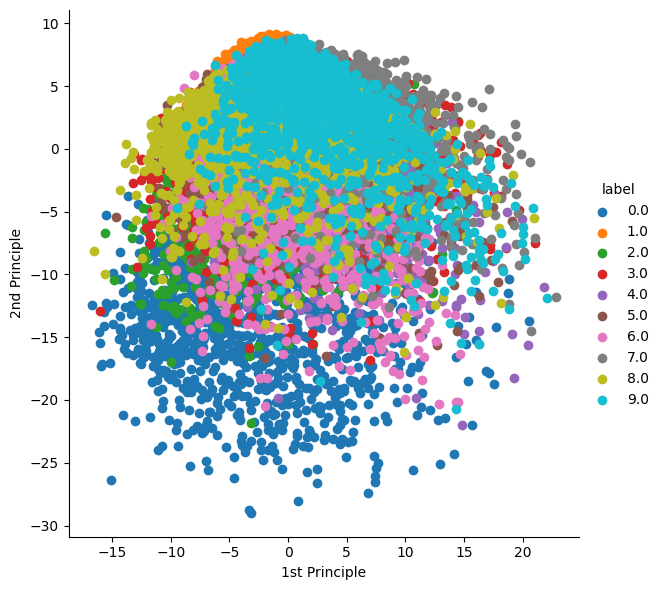

In [191]:
# ploting the 2d data points with seaborn
import seaborn as sn
sn.FacetGrid(dataframe, hue='label',height=6).map(plt.scatter, '1st Principle','2nd Principle').add_legend()
plt.show()

Implicit PCA

In [173]:
#implicit PCA using sklearn->decomposition->pca
from sklearn import decomposition
pca = decomposition.PCA()

In [190]:
#configuring of parameter
#2 components needed bcz 2d visiulization is to be done
pca.n_components = 2

#transform data, standardization is done by pca itself (no dendrology)
#covariance matrix, eigen values and vectors all done by pca itself
pca_data = pca.fit_transform(sample_data)
print(pca_data.shape, labels.shape)

#Adding label to 2d projected data
pca_data = np.vstack((pca_data.T,labels.T)).T
#New dataframe for plotting points
pac_df = pd.DataFrame(data = pca_data, columns =('1st Principle', '2nd Principle', 'labels'))


(15000, 2) (15000, 1)


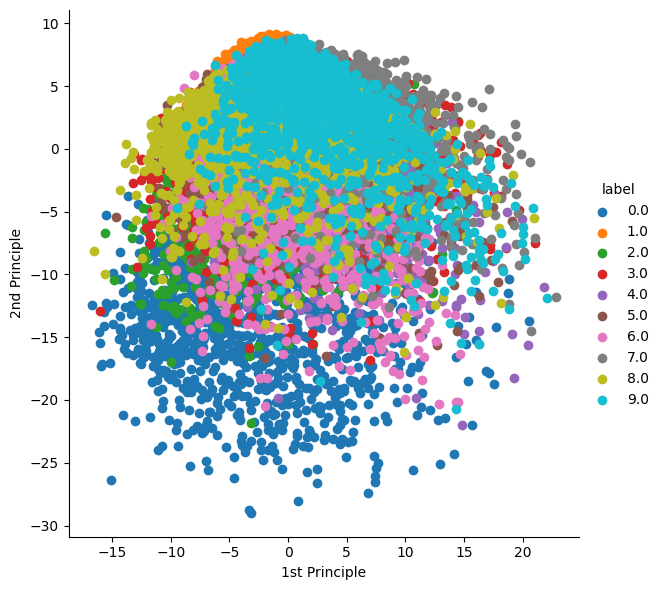

In [192]:
# ploting the 2d data points with seaborn
sn.FacetGrid(dataframe, hue='label',height=6).map(plt.scatter, '1st Principle','2nd Principle').add_legend()
plt.show()

Meh job with PCA, waqt zaayi
